In [1]:
# EDA를 위한 패키지들
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False) # False로 해야 - 부호가 안깨짐

In [ ]:
# # pandas 생략없이 모두 출력
# pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_dir_items', 100)

In [3]:
train = pd.read_csv("./data/train_3.csv", encoding="cp949")
train

,ID,사고일시,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,화물차지역수,보호구역,불법주정차,차량전용,평지도로,cctv 설치개수,주차장개수,어린이보호구역개수,sin_hour,cos_hour
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,...,0,1.0,4.0,0.0,0.0,391.0,11.0,2.0,0.000000e+00,1.000000
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,...,1,1.0,8.0,0.0,3.0,941.0,4.0,0.0,0.000000e+00,1.000000
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,...,0,0.0,0.0,0.0,4.0,473.0,0.0,5.0,2.697968e-01,0.962917
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,1,7.0,0.0,0.0,3.0,534.0,14.0,11.0,5.195840e-01,0.854419
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,0,7.0,0.0,0.0,5.0,2064.0,1.0,0.0,8.878852e-01,0.460065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.878852e-01,0.460065
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,...,0,11.0,12.0,3.0,4.0,844.0,5.0,0.0,-8.878852e-01,0.460065
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,...,1,4.0,13.0,0.0,5.0,167.0,1.0,0.0,-5.195840e-01,0.854419
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,...,0,0.0,0.0,0.0,1.0,210.0,1.0,0.0,-2.697968e-01,0.962917


In [4]:
test = pd.read_csv("./data/test_3.csv", encoding="cp949")
test

,ID,사고일시,요일,기상상태,도로형태,노면상태,사고유형,시군구,보행노인사고사고건수,보행노인사고사망자수,...,화물차지역수,보호구역,불법주정차,차량전용,평지도로,cctv 설치개수,주차장개수,어린이보호구역개수,sin_hour,cos_hour
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,교차로 - 교차로안,건조,차대사람,대구광역시 수성구 상동,0,0,...,0,0.0,0.0,0.0,4.0,700.0,0.0,5.0,0.269797,0.962917
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,단일로 - 기타,건조,차대사람,대구광역시 수성구 지산동,21,3,...,1,2.0,0.0,0.0,5.0,0.0,2.0,10.0,0.269797,0.962917
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,교차로 - 교차로안,건조,차대차,대구광역시 수성구 수성동2가,0,0,...,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.887885,0.460065
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,단일로 - 기타,건조,차대차,대구광역시 수성구 신매동,14,2,...,0,6.0,0.0,0.0,5.0,0.0,3.0,7.0,0.887885,0.460065
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,교차로 - 교차로안,건조,차대차,대구광역시 달서구 감삼동,6,0,...,1,1.0,8.0,0.0,3.0,941.0,4.0,0.0,0.997669,-0.068242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,단일로 - 터널,건조,차대차,대구광역시 남구 대명동,94,5,...,1,8.0,35.0,0.0,19.0,5377.0,21.0,26.0,-0.979084,0.203456
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,단일로 - 기타,건조,차대차,대구광역시 수성구 시지동,0,0,...,0,1.0,0.0,0.0,3.0,0.0,0.0,5.0,-0.979084,0.203456
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,단일로 - 기타,건조,차대차,대구광역시 수성구 연호동,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.730836,0.682553
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,교차로 - 교차로부근,건조,차대차,대구광역시 수성구 범물동,17,4,...,0,3.0,0.0,0.0,4.0,0.0,0.0,7.0,-0.730836,0.682553


In [5]:
def wrangiling(data_set):
    print("==================")
    print("       Shape      ")
    print("==================")

    display(data_set.shape)

    print("==================")
    print("        Info      ")
    print("==================")

    display(data_set.info())

    print("==================")
    print("      Columns     ")
    print("==================")
    
    display(data_set.columns)

    print("==================")
    print("        NaN       ")
    print("==================")

    display(data_set.isna().sum())

    print("==================")
    print("    Duplicated    ")
    print("==================")
    
    display(data_set[data_set.duplicated()])

    print("==================")
    print("    Description   ")
    print("==================")

    display(data_set.describe())

    print("==================")
    print("      Unique      ")
    print("==================")

    display(data_set.nunique())

In [6]:
wrangiling(data_set=train)

       Shape      


(39609, 106)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Columns: 106 entries, ID to cos_hour
dtypes: float64(9), int64(79), object(18)
memory usage: 32.0+ MB


None

      Columns     


Index(['ID', '사고일시', '요일', '기상상태', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류',
       '법규위반', '가해운전자 차종',
       ...
       '화물차지역수', '보호구역', '불법주정차', '차량전용', '평지도로', 'cctv 설치개수', '주차장개수',
       '어린이보호구역개수', 'sin_hour', 'cos_hour'],
      dtype='object', length=106)

        NaN       


ID             0
사고일시           0
요일             0
기상상태           0
도로형태           0
            ... 
cctv 설치개수    223
주차장개수        223
어린이보호구역개수    223
sin_hour       0
cos_hour       0
Length: 106, dtype: int64

    Duplicated    


,ID,사고일시,요일,기상상태,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,...,화물차지역수,보호구역,불법주정차,차량전용,평지도로,cctv 설치개수,주차장개수,어린이보호구역개수,sin_hour,cos_hour


    Description   


,사망자수,중상자수,경상자수,부상자수,ECLO,보행노인사고사고건수,보행노인사고사망자수,보행노인사고중상자수,보행노인사고경상자수,oldman_ECLO,...,화물차지역수,보호구역,불법주정차,차량전용,평지도로,cctv 설치개수,주차장개수,어린이보호구역개수,sin_hour,cos_hour
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000,...,39609.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39386.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704,20.548966,1.441743,13.166225,6.482870,99.697165,...,0.451362,3.851419,3.853907,0.318006,5.691591,684.598842,8.639821,7.294724,-0.286085,-0.126245
std,0.090109,0.500845,0.992034,0.394670,3.207206,25.458287,1.847811,16.637229,9.521551,123.621476,...,0.719084,4.688490,8.013055,0.989932,5.369890,1116.744854,10.941905,11.269997,0.656200,0.686762
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997669,-0.990686
25%,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,2.000000,38.000000,2.000000,0.000000,-0.887885,-0.775711
50%,0.000000,0.000000,1.000000,0.000000,3.000000,12.000000,1.000000,6.000000,3.000000,48.000000,...,0.000000,3.000000,0.000000,0.000000,4.000000,352.000000,4.000000,2.000000,-0.519584,-0.334880
75%,0.000000,0.000000,1.000000,0.000000,6.000000,26.000000,2.000000,17.000000,7.000000,142.000000,...,1.000000,6.000000,4.000000,0.000000,7.000000,876.000000,14.000000,10.000000,0.136167,0.460065
max,2.000000,6.000000,22.000000,10.000000,74.000000,94.000000,7.000000,60.000000,40.000000,470.000000,...,3.000000,28.000000,35.000000,7.000000,24.000000,5377.000000,49.000000,60.000000,0.997669,1.000000


      Unique      


ID           39609
사고일시         18057
요일               7
기상상태             6
도로형태            11
             ...  
cctv 설치개수      141
주차장개수           22
어린이보호구역개수       20
sin_hour        24
cos_hour        12
Length: 106, dtype: int64

In [15]:
for col in train.columns:
    print(col)

ID
사고일시
요일
기상상태
도로형태
노면상태
사고유형
사고유형 - 세부분류
법규위반
가해운전자 차종
가해운전자 성별
가해운전자 연령
가해운전자 상해정도
피해운전자 차종
피해운전자 성별
피해운전자 연령
피해운전자 상해정도
사망자수
중상자수
경상자수
부상자수
ECLO
시군구
보행노인사고사고건수
보행노인사고사망자수
보행노인사고중상자수
보행노인사고경상자수
oldman_ECLO
보행노인사고지역수
자전거사고사고건수
자전거사고사망자수
자전거사고중상자수
자전거사고경상자수
bicycle_ECLO
자전거사고지역수
보행어린이사고사고건수
보행어린이사고사망자수
보행어린이사고중상자수
보행어린이사고경상자수
child_ECLO
보행어린이사고지역수
음주사고사고건수
음주사고사망자수
음주사고중상자수
음주사고경상자수
drunk_ECLO
음주사고지역수
결빙사고사고건수
결빙사고사망자수
결빙사고중상자수
결빙사고경상자수
freezing_ECLO
결빙사고지역수
보행자무단횡단발생건수
보행자무단횡단사망자수
보행자무단횡단중상자수
보행자무단횡단경상자수
jaywalking_ECLO
보행자무단횡단지역수
이륜차사고사고건수
이륜차사고사망자수
이륜차사고중상자수
이륜차사고경상자수
motorcycle_ECLO
이륜차사고지역수
보행자사고사고건수
보행자사고사망자수
보행자사고중상자수
보행자사고경상자수
pedstrians_ECLO
보행자사고지역수
스쿨존내어린이사고사고건수
스쿨존내어린이사고사망자수
스쿨존내어린이사고중상자수
스쿨존내어린이사고경상자수
schoolzone_ECLO
스쿨존내어린이사고지역수
연휴기간사고건수
연휴기간사망자수
연휴기간중상자수
연휴기간경상자수
tmzon_ECLO
연휴기간지역수
법규위반사고건수
법규위반사망자수
법규위반중상자수
법규위반경상자수
violt_ECLO
중앙선침범
신호위반
법규위반지역수
화물차사고건수
화물차사망자수
화물차중상자수
화물차경상자수
truck_ECLO
화물차지역수
보호구역
불법주정차
차량전용
평지도로
cctv 설치개수
주차장개수
어린이보호구역개수
sin_hour
cos_hour


In [25]:
train_data = train.copy()
train_data["동가"] = train["시군구"].apply(lambda x : x.split(" ")[-1])
train_data["동가"]

0          대신동
1          감삼동
2          두산동
3          복현동
4          신암동
         ...  
39604    수성동3가
39605      상인동
39606      월성동
39607       장동
39608      비산동
Name: 동가, Length: 39609, dtype: object

In [41]:
acci_data = pd.DataFrame(train_data["동가"].value_counts())
acci_data = acci_data.sort_index()
acci_data

,count
동가,
가창면,115
가천동,58
각산동,174
갈산동,110
감삼동,678
...,...
호산동,193
화원읍,555
화전동,3


In [43]:
count_data = train_data[["동가", "cctv 설치개수", "주차장개수", "어린이보호구역개수"]].sort_values("동가")
count_data = count_data.drop_duplicates()
count_data["acci_count"] = acci_data["count"].values
count_data

,동가,cctv 설치개수,주차장개수,어린이보호구역개수,acci_count
36624,가창면,1123.0,2.0,8.0,115
12957,가천동,0.0,0.0,0.0,58
31093,각산동,139.0,0.0,0.0,174
10876,갈산동,351.0,4.0,0.0,110
19474,감삼동,941.0,4.0,0.0,678
...,...,...,...,...,...
15369,호산동,214.0,1.0,0.0,193
34014,화원읍,940.0,14.0,38.0,555
32412,화전동,22.0,1.0,0.0,3
30652,황금동,0.0,4.0,5.0,588


In [44]:
count_data = count_data.fillna(0)

In [45]:
count_data

,동가,cctv 설치개수,주차장개수,어린이보호구역개수,acci_count
36624,가창면,1123.0,2.0,8.0,115
12957,가천동,0.0,0.0,0.0,58
31093,각산동,139.0,0.0,0.0,174
10876,갈산동,351.0,4.0,0.0,110
19474,감삼동,941.0,4.0,0.0,678
...,...,...,...,...,...
15369,호산동,214.0,1.0,0.0,193
34014,화원읍,940.0,14.0,38.0,555
32412,화전동,22.0,1.0,0.0,3
30652,황금동,0.0,4.0,5.0,588


In [46]:
count_data2 = count_data.drop("동가", axis=1)

<Axes: >

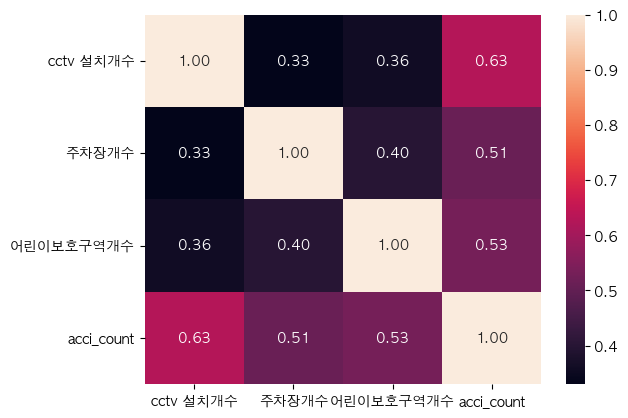

In [47]:
sns.heatmap(count_data2.corr(), annot=True, fmt=".2f")

In [48]:
train_data[["동가", "ECLO"]].sort_values(["동가"])

,동가,ECLO
36624,가창면,5
31293,가창면,6
4552,가창면,9
5375,가창면,11
35258,가창면,9
...,...,...
4499,효목동,3
14665,효목동,3
27931,효목동,3
13662,효목동,6


In [49]:
loops = train_data["동가"].unique()
loops.sort()
loops

array(['가창면', '가천동', '각산동', '갈산동', '감삼동', '검단동', '검사동', '계산동1가', '계산동2가',
       '고모동', '고성동1가', '고성동2가', '고성동3가', '공평동', '관음동', '괴전동', '교동', '구암동',
       '구지면', '국우동', '금강동', '금호동', '남산동', '남성로', '남일동', '내당동', '내동',
       '노곡동', '노변동', '노원동1가', '노원동2가', '노원동3가', '논공읍', '능성동', '다사읍',
       '달성동', '대곡동', '대림동', '대명동', '대봉동', '대신동', '대안동', '대천동', '대현동',
       '대흥동', '덕곡동', '덕산동', '도남동', '도동', '도원동', '도학동', '동내동', '동문동',
       '동변동', '동산동', '동성로1가', '동성로2가', '동성로3가', '동인동1가', '동인동2가', '동인동3가',
       '동인동4가', '동일동', '동천동', '동호동', '두류동', '두산동', '둔산동', '만촌동', '매여동',
       '매천동', '매호동', '문화동', '미곡동', '미대동', '방촌동', '백안동', '범물동', '범어동',
       '복현동', '본동', '본리동', '봉덕동', '봉무동', '봉산동', '부동', '북성로1가', '북성로2가',
       '불로동', '비산동', '사복동', '사수동', '사월동', '사일동', '산격동', '삼덕동', '삼덕동1가',
       '삼덕동2가', '삼덕동3가', '상동', '상리동', '상매동', '상서동', '상인동', '서문로1가',
       '서문로2가', '서변동', '서성로1가', '서성로2가', '서야동', '서호동', '성당동', '성동', '송정동',
       '송현동', '수동', '수성동1가', '수성동2가', '수성동3가', '수성동4가', '수창동', '숙천동',


In [50]:
train_data[train_data["동가"] == "가창면"].ECLO.sum()

612

In [51]:
ECLO_sum = []
for loop in loops:
    ECLO_sum.append(train_data[train_data["동가"] == loop].ECLO.sum())
ECLO_sum

[612,
 327,
 894,
 540,
 3213,
 270,
 549,
 11,
 312,
 165,
 45,
 236,
 311,
 354,
 1098,
 176,
 70,
 1510,
 896,
 628,
 45,
 533,
 1470,
 75,
 117,
 4707,
 42,
 186,
 366,
 403,
 432,
 1445,
 1445,
 27,
 3849,
 144,
 1357,
 104,
 7857,
 734,
 561,
 28,
 1363,
 1186,
 313,
 79,
 276,
 14,
 228,
 1089,
 83,
 32,
 47,
 250,
 293,
 10,
 162,
 72,
 389,
 506,
 325,
 331,
 7,
 2007,
 1115,
 2825,
 2925,
 53,
 4362,
 11,
 793,
 637,
 87,
 56,
 33,
 1605,
 140,
 1214,
 5419,
 1793,
 1679,
 1826,
 3105,
 775,
 577,
 215,
 60,
 30,
 1149,
 4410,
 73,
 481,
 393,
 36,
 3974,
 221,
 797,
 445,
 361,
 1650,
 962,
 40,
 39,
 4908,
 27,
 33,
 1635,
 33,
 30,
 13,
 478,
 2029,
 157,
 99,
 3608,
 28,
 1038,
 727,
 511,
 1055,
 95,
 133,
 59,
 823,
 803,
 2887,
 1651,
 28,
 908,
 3753,
 11,
 3622,
 211,
 206,
 573,
 1098,
 11,
 1164,
 3349,
 123,
 266,
 264,
 49,
 303,
 2873,
 747,
 1314,
 901,
 179,
 1930,
 1922,
 2865,
 1052,
 1084,
 79,
 736,
 8,
 1370,
 584,
 42,
 178,
 53,
 10,
 1455,
 247,
 1301,

In [52]:
ECLO_mean = []
for loop in loops:
    ECLO_mean.append(train_data[train_data["동가"] == loop].ECLO.mean())
ECLO_mean

[5.321739130434783,
 5.637931034482759,
 5.137931034482759,
 4.909090909090909,
 4.738938053097345,
 4.153846153846154,
 4.463414634146342,
 3.6666666666666665,
 5.379310344827586,
 4.852941176470588,
 5.0,
 4.140350877192983,
 4.573529411764706,
 4.116279069767442,
 4.990909090909091,
 4.888888888888889,
 4.666666666666667,
 4.326647564469914,
 5.463414634146342,
 5.147540983606557,
 3.75,
 5.793478260869565,
 4.59375,
 4.166666666666667,
 5.318181818181818,
 5.018123667377399,
 8.4,
 10.333333333333334,
 4.88,
 4.477777777777778,
 4.5,
 4.832775919732441,
 5.60077519379845,
 6.75,
 4.859848484848484,
 3.891891891891892,
 4.8120567375886525,
 6.117647058823529,
 4.492281303602058,
 4.7973856209150325,
 4.282442748091603,
 9.333333333333334,
 4.867857142857143,
 4.561538461538461,
 5.131147540983607,
 9.875,
 4.677966101694915,
 7.0,
 5.428571428571429,
 4.653846153846154,
 5.533333333333333,
 4.571428571428571,
 3.9166666666666665,
 5.0,
 5.051724137931035,
 5.0,
 3.951219512195122,
 

In [53]:
count_data2["ECLO_mean"] = ECLO_mean
count_data2

,cctv 설치개수,주차장개수,어린이보호구역개수,acci_count,ECLO_mean
36624,1123.0,2.0,8.0,115,5.321739
12957,0.0,0.0,0.0,58,5.637931
31093,139.0,0.0,0.0,174,5.137931
10876,351.0,4.0,0.0,110,4.909091
19474,941.0,4.0,0.0,678,4.738938
...,...,...,...,...,...
15369,214.0,1.0,0.0,193,4.606218
34014,940.0,14.0,38.0,555,4.864865
32412,22.0,1.0,0.0,3,3.333333
30652,0.0,4.0,5.0,588,4.484694


In [54]:
count_data2["ECLO_sum"] = ECLO_sum
count_data2

,cctv 설치개수,주차장개수,어린이보호구역개수,acci_count,ECLO_mean,ECLO_sum
36624,1123.0,2.0,8.0,115,5.321739,612
12957,0.0,0.0,0.0,58,5.637931,327
31093,139.0,0.0,0.0,174,5.137931,894
10876,351.0,4.0,0.0,110,4.909091,540
19474,941.0,4.0,0.0,678,4.738938,3213
...,...,...,...,...,...,...
15369,214.0,1.0,0.0,193,4.606218,889
34014,940.0,14.0,38.0,555,4.864865,2700
32412,22.0,1.0,0.0,3,3.333333,10
30652,0.0,4.0,5.0,588,4.484694,2637


            cctv 설치개수     주차장개수  어린이보호구역개수  acci_count  ECLO_mean  ECLO_sum
cctv 설치개수    1.000000  0.329878   0.358922    0.626342  -0.066627  0.620635
주차장개수        0.329878  1.000000   0.398710    0.510679  -0.154192  0.506112
어린이보호구역개수    0.358922  0.398710   1.000000    0.529377  -0.063479  0.541908
acci_count   0.626342  0.510679   0.529377    1.000000  -0.170741  0.998029
ECLO_mean   -0.066627 -0.154192  -0.063479   -0.170741   1.000000 -0.151008
ECLO_sum     0.620635  0.506112   0.541908    0.998029  -0.151008  1.000000


<Axes: >

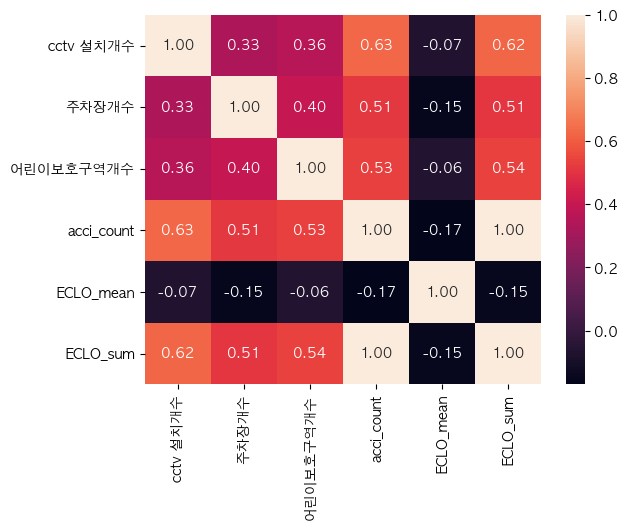

In [55]:
print(count_data2.corr())
sns.heatmap(count_data2.corr(), annot=True, fmt=".2f")

In [56]:
train_data.groupby('동가')['ECLO'].mean()

동가
가창면    5.321739
가천동    5.637931
각산동    5.137931
갈산동    4.909091
감삼동    4.738938
         ...   
호산동    4.606218
화원읍    4.864865
화전동    3.333333
황금동    4.484694
효목동    4.840871
Name: ECLO, Length: 196, dtype: float64